# Tutorial: Transcriptome Overlap Analysis with TROM

1. First, we need to download the collection of standard package development tools in R.

In [1]:
install.packages('devtools')
options(warn=-1)


The downloaded binary packages are in
	/var/folders/fv/6d1w07052kzgqzlw4g2k97jm0000gn/T//RtmpIwgfye/downloaded_packages


2. Next, we need to install TROM using BiocManager.

In [2]:
if (!requireNamespace("BiocManager", force = TRUE))
   install.packages("BiocManager")
BiocManager::install(c("GO.db", "topGO"))

devtools::install_github("Vivianstats/TROM")

Loading required namespace: BiocManager




The downloaded binary packages are in
	/var/folders/fv/6d1w07052kzgqzlw4g2k97jm0000gn/T//RtmpIwgfye/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.10 (BiocManager 1.30.16), R 3.6.3 (2020-02-29)

Old packages: 'backports', 'BH', 'brio', 'cli', 'cpp11', 'crayon',
  'credentials', 'crosstalk', 'digest', 'fs', 'gamlss.data', 'gamlss.dist',
  'generics', 'gert', 'glue', 'httpuv', 'knitr', 'Matrix', 'memoise',
  'nanotime', 'openxlsx', 'pbdZMQ', 'pillar', 'pkgbuild', 'pkgload',
  'RcppArmadillo', 'RcppCCTZ', 'remotes', 'rlang', 'RSQLite', 'sessioninfo',
  'snow', 'stringi', 'testthat', 'tibble', 'tinytex', 'usethis', 'uuid',
  'viridis', 'withr', 'xfun', 'xml2'

Skipping install of 'TROM' from a github remote, the SHA1 (2a74faac) has not changed since last install.
  Use `force = TRUE` to force installation



In [3]:
library(TROM)

Loading required package: lattice





3. Read in the file with transcriptomes as each column. The last index should be the number of samples (columns) + 1. We will let the data determine the z score threshold (z_thre) to score the associated genes. If you choose a z_thre is too high, no associated genes will be selected. 

In [5]:
sp_gene_expr <- read.csv("merged_atlas_log2fc.csv", header=T, stringsAsFactors=F)
z_thre_from_data <- choose.z(sp_gene_expr, mode=F)
sim_matrix <- ws.trom(sp_gene_expr, save_overlap_genes=F, z_thre=z_thre_from_data)
write.csv(sim_matrix, "merged_trom_matrix.csv")

[1] "z=-2"
[1] "z=-1.9"
[1] "z=-1.8"
[1] "z=-1.7"
[1] "z=-1.6"
[1] "z=-1.5"
[1] "z=-1.4"
[1] "z=-1.3"
[1] "z=-1.2"
[1] "z=-1.1"
[1] "z=-1"
[1] "z=-0.9"
[1] "z=-0.8"
[1] "z=-0.7"
[1] "z=-0.6"
[1] "z=-0.5"
[1] "z=-0.4"
[1] "z=-0.3"
[1] "z=-0.2"
[1] "z=-0.0999999999999999"
[1] "z=0"
[1] "z=0.1"
[1] "z=0.2"
[1] "z=0.3"
[1] "z=0.4"
[1] "z=0.5"
[1] "z=0.6"
[1] "z=0.7"
[1] "z=0.8"
[1] "z=0.9"
[1] "z=1"
[1] "z=1.1"
[1] "z=1.2"
[1] "z=1.3"
[1] "z=1.4"
[1] "z=1.5"
[1] "z=1.6"
[1] "z=1.7"
[1] "z=1.8"
[1] "z=1.9"
[1] "z=2"
[1] "z=2.1"
[1] "z=2.2"
[1] "z=2.3"
[1] "z=2.4"
[1] "z=2.5"
[1] "z=2.6"
[1] "z=2.7"
[1] "z=2.8"
[1] "z=2.9"
[1] "z=3"


4. Time to run TROM. We use the ws.trom() function for data within the same species (in our case, Homo sapiens). We set the z score threshold as generated, and save the output matrix as a csv, so we can work with it in Python.

In [10]:
sim_matrix <- ws.trom(sp_gene_expr, save_overlap_genes=F, z_thre=1)
write.csv(sim_matrix, "merged_15z_trom_matrix.csv")

In [7]:
sim_matrix

,CARHSP1,CCDC88A,CENPA,CLOCK,CRX,DLX5,DMTF1,DYNLL1,ETV5,FIGLA,⋯,Yamashiro2018_ag63_2,Yamashiro2018_ag77_1,Yamashiro2018_ag77_2,Yamashiro2018_ag77_1390G3_AG.VT.,Yamashiro2018_ag77_1390G3_AG.VT..1,Yamashiro2018_ag120_1390G3_AG.VT._1,Yamashiro2018_ag120_1390G3_AG...VT.,Yamashiro2018_ag120_1390G3_AG.VT._2,Yamashiro2018_ag120_1390G3_AG.VT.,Yamashiro2018_ag120_1390G3_AG.VT..1
CARHSP1,300.00000,40.62255,300.000000,300.00000,19.717258,300.00000,300.00000,300.00000,300.000000,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
CCDC88A,40.62255,300.00000,33.523633,59.35813,300.000000,85.03608,107.32898,126.67726,12.599155,154.3417,⋯,0.000000,0.09104325,0.0000000,5.127616,0.000000,0.00000,18.8846760,21.7817201,12.2265786,15.2988007
CENPA,300.00000,33.52363,300.000000,300.00000,1.182892,300.00000,188.05205,300.00000,300.000000,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,0.0000000,6.4095894,17.0946849,7.8451299
CLOCK,300.00000,59.35813,300.000000,300.00000,41.754120,300.00000,132.65618,300.00000,266.601078,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,0.0000000,0.2165019,1.3999414,0.2248384
CRX,19.71726,300.00000,1.182892,41.75412,300.000000,75.46210,141.22041,99.86945,3.819335,144.7494,⋯,0.000000,0.00000000,0.4598515,3.190989,0.000000,0.00000,3.7602753,7.8875301,10.7571276,6.7663178
DLX5,300.00000,85.03608,300.000000,300.00000,75.462100,300.00000,300.00000,300.00000,300.000000,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,1.7902054,11.0078346,10.2931666,6.2741701
DMTF1,300.00000,107.32898,188.052052,132.65618,141.220406,300.00000,300.00000,300.00000,300.000000,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,3.5593102,0.0000000,0.0000000,0.8782744
DYNLL1,300.00000,126.67726,300.000000,300.00000,99.869451,300.00000,300.00000,300.00000,315.124804,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,10.1646586,14.8716402,14.0339934,30.8603908
ETV5,300.00000,12.59915,300.000000,266.60108,3.819335,300.00000,300.00000,315.12480,300.000000,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,0.0000000,0.0000000,0.0000000,0.0000000
FIGLA,300.00000,154.34172,300.000000,300.00000,144.749405,300.00000,300.00000,300.00000,300.000000,300.0000,⋯,0.000000,0.00000000,0.0000000,0.000000,0.000000,0.00000,0.0000000,15.4755118,6.3235107,12.7317742


5. Finally, let's do a quick hierarchical clustering-based visualization of the similarity matrix.

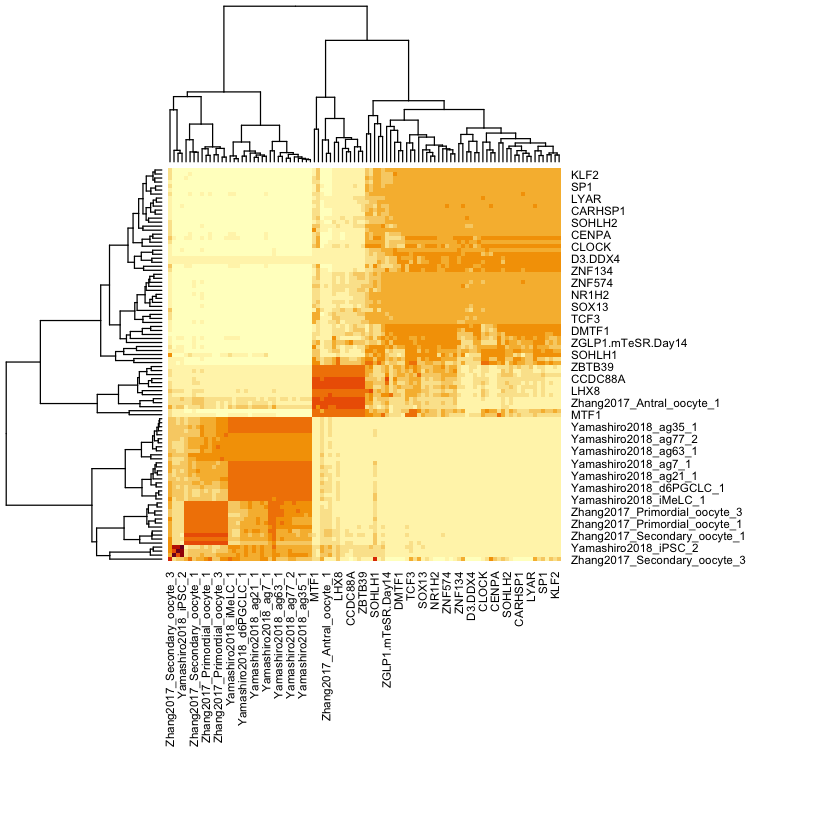

In [8]:
sim_matrix <- ws.trom(sp_gene_expr, save_overlap_genes=F, z_thre=0.5)

heatmap(sim_matrix, margins = c(14,14), scale = "none")